
🎯 تحليل الأعمدة:
                              CorrelationWithTarget  RandomForestImportance
Daily_Coffee_Tea_Consumption               0.767608                0.103209
Q1_3                                       0.813006                0.089701
Focus_Score_Video                          0.858806                0.087673
Q2_3                                       0.801991                0.071918
Q1_8                                       0.801393                0.068158
Q2_4                                       0.804611                0.060729
Q1_1                                       0.796164                0.052812
Anxiety_Depression_Levels                  0.840585                0.049530
Q1_6                                       0.794501                0.048891
Q2_9                                       0.804037                0.045534
Q2_8                                       0.783383                0.038679
Q2_5                                       0.792866                0.0

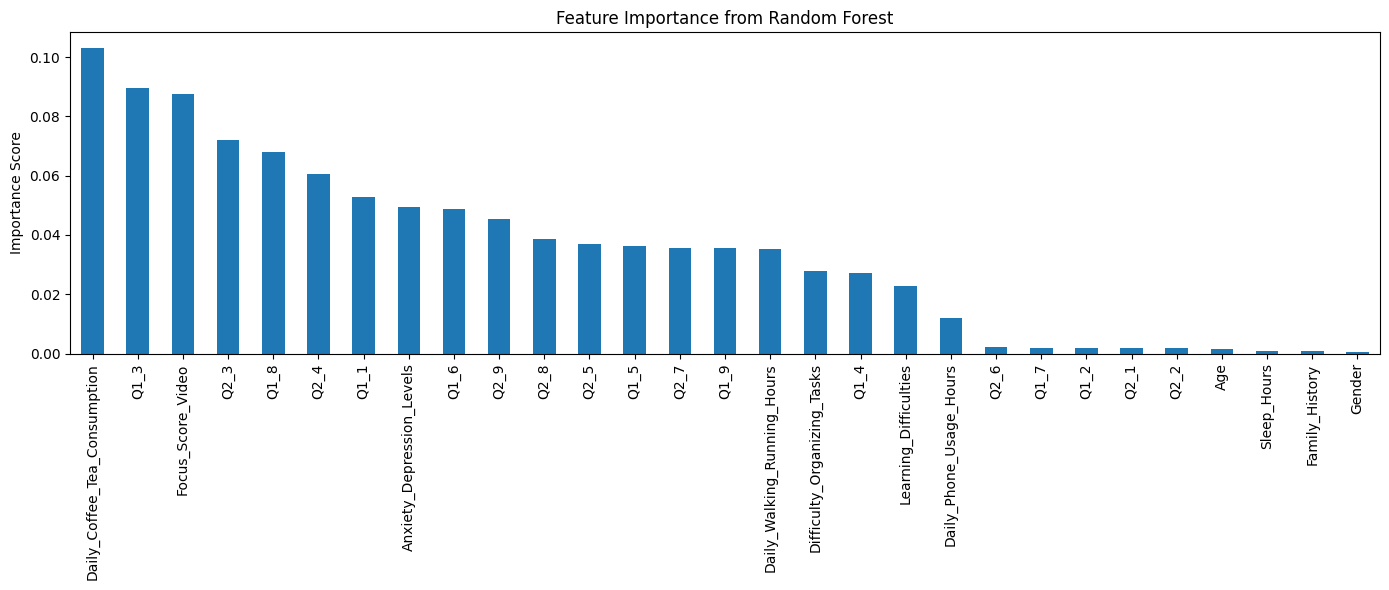

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# replace with your dataset path
df = pd.read_csv("adhd_dataset.csv")  
df.dropna(inplace=True)

X = df.drop(columns=['Diagnosis_Class'])
y = df['Diagnosis_Class']


correlation_with_target = df.corr()['Diagnosis_Class'].drop('Diagnosis_Class').abs().sort_values(ascending=False)


rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


feature_analysis = pd.DataFrame({
    'CorrelationWithTarget': correlation_with_target,
    'RandomForestImportance': feature_importances
}).sort_values(by='RandomForestImportance', ascending=False)

print("\n تحليل الأعمدة:")
print(feature_analysis)


plt.figure(figsize=(14, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\Ahmed Mohamed\AppData\Local\Temp\ipykernel_15620\697052850.py:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ahmed Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


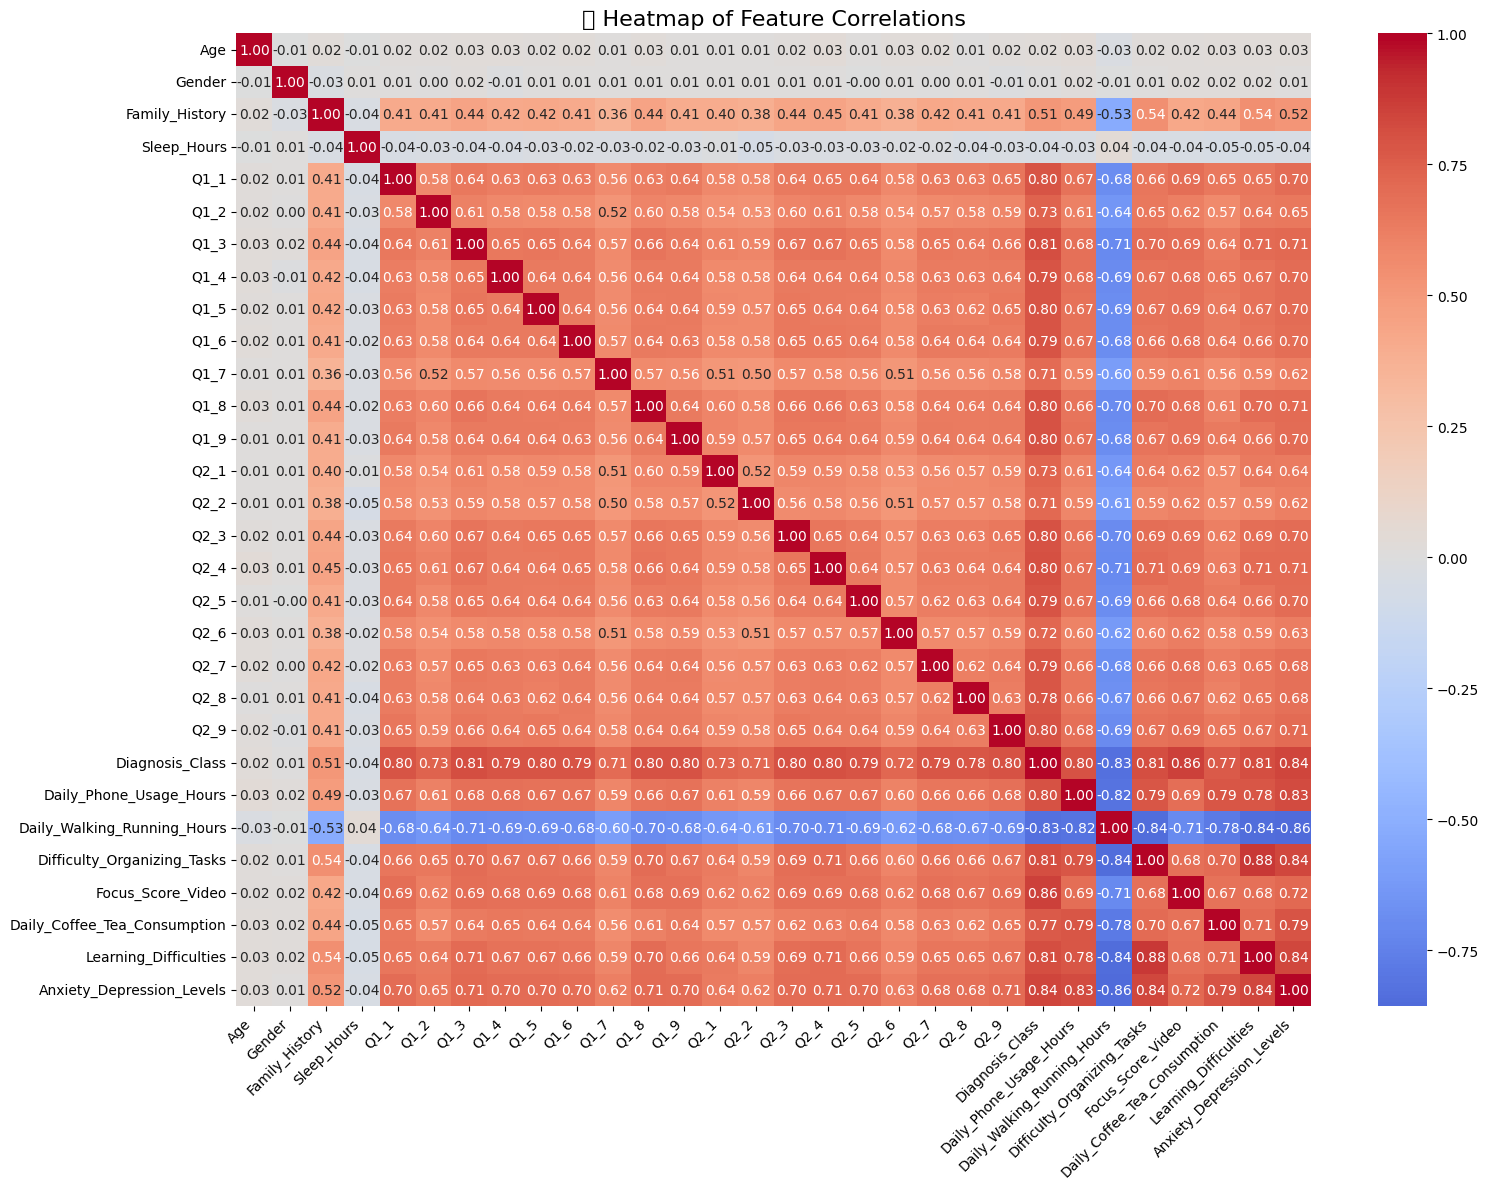

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("adhd_dataset.csv") 


df.dropna(inplace=True)

#correlation matrix
corr = df.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔥 Heatmap of Feature Correlations", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("adhd_dataset.csv")  
columns_to_drop = ['Age', 'Gender', 'Daily_Walking_Running_Hours', 'Sleep_Hours']
df_dropped = df.drop(columns=columns_to_drop)
df_dropped.to_csv("cleaned_ADHD_dataset.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("cleaned_ADHD_dataset.csv")

X = df.drop(columns=['Diagnosis_Class'])
y = df['Diagnosis_Class']

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'NeuralNetwork_Default': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'NeuralNetwork_Tuned': MLPClassifier(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1,
        max_iter=3000,
        random_state=42
    )
}


In [ ]:
# train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# print results
results_sorted = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

for model_name, acc in results_sorted.items():
    print(f"{model_name}: {acc*100:.2f}%")


RandomForest: 99.92%
NeuralNetwork_Tuned: 98.69%
SVM: 98.46%
NeuralNetwork_Default: 98.31%
DecisionTree: 97.92%
LogisticRegression: 97.31%
KNN: 97.00%
NaiveBayes: 95.46%


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

df = pd.read_csv("cleaned_ADHD_dataset.csv")  


X = df.drop(columns=['Diagnosis_Class'])
y = df['Diagnosis_Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(
    n_estimators=50,           
    max_depth=6,                
    learning_rate=0.1,         
    subsample=0.8,            
    colsample_bytree=0.8,       
    use_label_encoder=False,   
    eval_metric='mlogloss',     
    random_state=42
)

xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

print(f"🎯 XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))


🎯 XGBoost Accuracy: 99.54%

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       0.99      0.99      0.99       172
           2       0.99      0.99      0.99       230
           3       1.00      1.00      1.00       431

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



c:\Users\Ahmed Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=3000,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("🔥 Neural Network (Tuned) Report:\n", classification_report(y_test, y_pred))


🔥 Neural Network (Tuned) Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       467
           1       0.97      0.95      0.96       172
           2       0.96      0.98      0.97       230
           3       1.00      1.00      1.00       431

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



In [ ]:
import joblib

# RandomForest
best_model = models['RandomForest']
joblib.dump(best_model, "best_modelADHD.pkl")
print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl


In [ ]:
import joblib
import pandas as pd


model = joblib.load("best_modelADHD.pkl")

new_data = pd.DataFrame([{
    'Family_History': 1,
    'Q1_1': 3,
    'Q1_2': 2,
    'Q1_3': 3,
    'Q1_4': 2,
    'Q1_5': 3,
    'Q1_6': 2,
    'Q1_7': 2,
    'Q1_8': 2,
    'Q1_9': 2,
    'Q2_1': 2,
    'Q2_2': 3,
    'Q2_3': 2,
    'Q2_4': 3,
    'Q2_5': 2,
    'Q2_6': 2,
    'Q2_7': 2,
    'Q2_8': 2,
    'Q2_9': 2,
    'Daily_Phone_Usage_Hours': 10,
    'Difficulty_Organizing_Tasks': 1,
    'Focus_Score_Video': 9,
    'Daily_Coffee_Tea_Consumption': 5,
    'Learning_Difficulties': 1,
    'Anxiety_Depression_Levels': 3
}])

prediction = model.predict(new_data)
print("🔍 التشخيص المتوقع (Diagnosis_Class):", prediction[0])


🔍 التشخيص المتوقع (Diagnosis_Class): 3


In [ ]:
import joblib
import pandas as pd


model = joblib.load("best_modelADHD.pkl")
new_data = pd.DataFrame([{
    'Family_History': 0,
    'Q1_1': 2,
    'Q1_2': 3,
    'Q1_3': 2,
    'Q1_4': 2,
    'Q1_5': 3,
    'Q1_6': 2,
    'Q1_7': 2,
    'Q1_8': 3,
    'Q1_9': 2,
    'Q2_1': 2,
    'Q2_2': 3,
    'Q2_3': 2,
    'Q2_4': 2,
    'Q2_5': 2,
    'Q2_6': 3,
    'Q2_7': 2,
    'Q2_8': 3,
    'Q2_9': 3, 
    'Daily_Phone_Usage_Hours': 8,
    'Difficulty_Organizing_Tasks': 1,
    'Focus_Score_Video': 7,
    'Daily_Coffee_Tea_Consumption': 5,
    'Learning_Difficulties': 1,
    'Anxiety_Depression_Levels': 3
}])


prediction = model.predict(new_data)
print("🎯 التشخيص المتوقع (Diagnosis_Class):", prediction[0])

probs = model.predict_proba(new_data)
for i, p in enumerate(probs[0]):
    print(f"🔹 احتمال أن يكون الكلاس {i}: {p*100:.2f}%")


🎯 التشخيص المتوقع (Diagnosis_Class): 3
🔹 احتمال أن يكون الكلاس 0: 0.00%
🔹 احتمال أن يكون الكلاس 1: 0.00%
🔹 احتمال أن يكون الكلاس 2: 1.00%
🔹 احتمال أن يكون الكلاس 3: 99.00%
